# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [127]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [128]:
#seu código aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

In [129]:
df['Servico_Internet'] = df['Servico_Internet'].astype(str)

In [130]:
df['PaymentMethod'] = df['PaymentMethod'].astype(str)

Unico que precisa ser alterado seria o Churn, porém vamos fazer o tratamento dos dados nulos antes de fazer a transformção para int.

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [131]:
#seu código aqui
df.isnull().sum()

customerID               0
Genero                  12
Idoso                    0
Casado                   0
Dependents               0
Tempo_como_Cliente       0
PhoneService          1482
Servico_Internet         0
Servico_Seguranca        0
Suporte_Tecnico          0
StreamingTV              0
Tipo_Contrato            0
PaymentMethod            0
Pagamento_Mensal       325
Total_Pago               0
Churn                    5
dtype: int64

In [132]:
(df.isnull().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [133]:
#seu código aqui
df.dropna(subset=['Genero'], inplace=True)

In [134]:
df['Genero'].isnull().sum()

0

Como era um porcentagem baixa, optei por apagar essas linhas.

In [135]:
df.drop(columns=["PhoneService"], inplace=True)

Como era muito grande a porcentagens de dados nulos, e acho que não ira influenciar em nosso churn, optei por excluir a coluna toda.

In [136]:
df.dropna(subset=['Churn'], inplace=True)

In [137]:
df['Churn'].isnull().sum()

0

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

In [138]:
#seu código aqui
df['Pagamento_Mensal'].mean()

65.60756321839081

In [139]:
df['Pagamento_Mensal'].median()

71.45

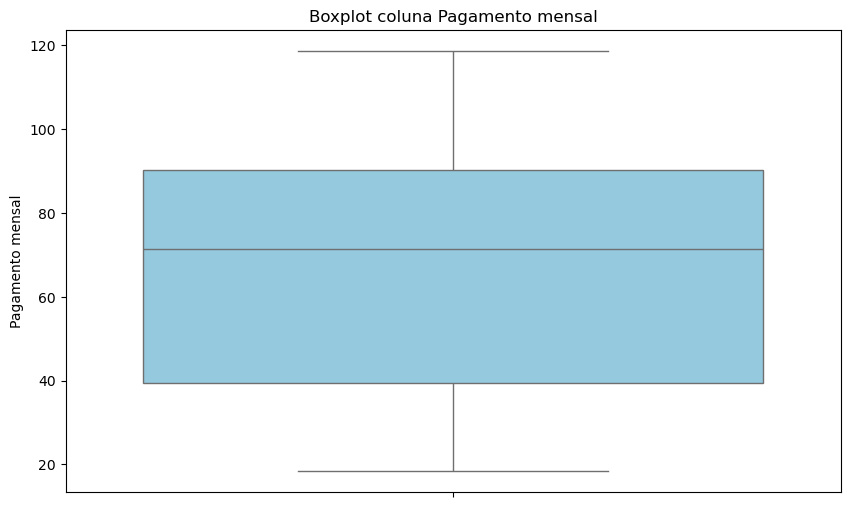

In [140]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot coluna Pagamento mensal')
plt.ylabel('Pagamento mensal')
plt.show()

Mesmo a média e a mediana estando próximas, usei um boxplot pra ver onde os clientes estavam concentrados e decidi usar a média pra preencher os valores nulos.

In [141]:
df['Pagamento_Mensal'].fillna(df['Pagamento_Mensal'].mean(), inplace=True)

C:\Users\joaoz\AppData\Local\Temp\ipykernel_18252\2091960842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pagamento_Mensal'].fillna(df['Pagamento_Mensal'].mean(), inplace=True)


In [142]:
df.isnull().sum()

customerID            0
Genero                0
Idoso                 0
Casado                0
Dependents            0
Tempo_como_Cliente    0
Servico_Internet      0
Servico_Seguranca     0
Suporte_Tecnico       0
StreamingTV           0
Tipo_Contrato         0
PaymentMethod         0
Pagamento_Mensal      0
Total_Pago            0
Churn                 0
dtype: int64

In [143]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype(int)

In [144]:
df['Genero'] = df['Genero'].astype(str)

Substitui o Yes e No por 1 e 0 para poder transformar o Churn em int. e para evitaar erros deixa para tranformar genero em str apenas agora.

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [145]:
#seu código aqui
df = df.replace({'Yes': 'Sim', 'NO': 'Não', 'No': 'Não'})

In [146]:
df['Genero'] = df['Genero'].str.upper()
df['Genero'] = df['Genero'].replace({'FEMALE': 'F', 'MALE': 'M'})
print(df['Genero'].unique())

['F' 'M']


In [147]:
df['Servico_Internet'] = df['Servico_Internet'].str.upper()
df['Servico_Internet'].unique()

array(['DSL', 'NÃO', 'FIBER OPTIC'], dtype=object)

In [148]:
df['PaymentMethod'] = df['PaymentMethod'].str.upper()
df['PaymentMethod'].unique()

array(['ELECTRONIC CHECK', 'MAILED CHECK', 'BANK TRANSFER (AUTOMATIC)',
       'CREDIT CARD (AUTOMATIC)'], dtype=object)

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand

In [149]:
df.rename(columns={'Dependents': 'Dependentes','customerID': 'ClienteID', 'PaymentMethod': 'Forma_Pagamento'}, inplace=True)

In [150]:
df.head(10)

,ClienteID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Forma_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,F,0,Sim,Não,1,DSL,Não,Não,Não,Month-to-month,ELECTRONIC CHECK,29.850000,29.85,0
1,5575-GNVDE,M,0,Não,Não,34,DSL,Sim,Não,Não,One year,MAILED CHECK,56.950000,1889.50,0
2,3668-QPYBK,M,0,Não,Não,2,DSL,Sim,Não,Não,Month-to-month,MAILED CHECK,53.850000,108.15,1
3,7795-CFOCW,M,0,Não,Não,45,DSL,Sim,Sim,Não,One year,BANK TRANSFER (AUTOMATIC),65.607563,1840.75,0
16,8191-XWSZG,F,0,Não,Não,52,NÃO,No internet service,No internet service,No internet service,One year,MAILED CHECK,65.607563,1022.95,0
17,9959-WOFKT,M,0,Não,Sim,71,FIBER OPTIC,Sim,Não,Sim,Two year,BANK TRANSFER (AUTOMATIC),65.607563,7382.25,0
18,4190-MFLUW,F,0,Sim,Sim,10,DSL,Não,Sim,Não,Month-to-month,CREDIT CARD (AUTOMATIC),65.607563,528.35,1
19,4183-MYFRB,F,0,Não,Não,21,FIBER OPTIC,Não,Não,Não,Month-to-month,ELECTRONIC CHECK,65.607563,1862.90,0
20,8779-QRDMV,M,1,Não,Não,1,DSL,Não,Não,Não,Month-to-month,ELECTRONIC CHECK,65.607563,39.65,1
21,1680-VDCWW,M,0,Sim,Não,12,NÃO,No internet service,No internet service,No internet service,One year,BANK TRANSFER (AUTOMATIC),65.607563,202.25,0
